In [ ]:
import boto3
import os
from dotenv import find_dotenv, load_dotenv

# Find .env
dotenv_path = find_dotenv()
# Load entries as environment variables
load_dotenv(dotenv_path)

# Get .env variables
ACCESS_KEY_ID = os.getenv('ACCESS_KEY_ID')
SECRET_ACCESS_KEY = os.getenv('SECRET_ACCESS_KEY')

s3_client = boto3.client(
    's3',
    aws_access_key_id=ACCESS_KEY_ID,
    aws_secret_access_key=SECRET_ACCESS_KEY
)

s3_resource = boto3.resource('s3')
s3_client.list_buckets()

# response = s3_client.list_objects_v2(Bucket='zrive-ds-data')
# objects = response.get('Contents', [])

# print(objects)

In [10]:
s3_client = boto3.client(
    's3',
    aws_access_key_id=ACCESS_KEY_ID,
    aws_secret_access_key=SECRET_ACCESS_KEY
)

s3_resource = boto3.resource('s3')
s3_client.list_buckets()

ClientError: An error occurred (AccessDenied) when calling the ListBuckets operation: User: arn:aws:iam::511025774037:user/z_ds_student is not authorized to perform: s3:ListAllMyBuckets with an explicit deny in an identity-based policy

In [ ]:
file_list = []
for obj in objects: 
    key = obj['Key']
    # print(key)
    if key.endswith('.parquet'):
        fname = os.path.basename(key)
        file_list.append(fname)
        print("Downloading:", key, "->", fname)
        s3_client.download_file(Bucket='zrive-ds-data', Key=key, Filename=fname)
    else:
        base = os.path.basename(key)
        print(f'Not downloading: {base}')

Not downloading: feature_frame.csv
Downloading: groceries/sampled-datasets/abandoned_carts.parquet → abandoned_carts_downloaded.parquet
Downloading: groceries/sampled-datasets/inventory.parquet → inventory_downloaded.parquet
Downloading: groceries/sampled-datasets/orders.parquet → orders_downloaded.parquet
Downloading: groceries/sampled-datasets/regulars.parquet → regulars_downloaded.parquet
Downloading: groceries/sampled-datasets/users.parquet → users_downloaded.parquet
Not downloading: model.joblib


## Understanding the problem

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

plt.style.use('fivethirtyeight')

In [3]:
data_path = os.getcwd()

In [4]:
abandoned_carts = pd.read_parquet(f'{data_path}/abandoned_carts.parquet')
inventory = pd.read_parquet(f'{data_path}/inventory.parquet')
orders = pd.read_parquet(f'{data_path}/orders.parquet')
regulars = pd.read_parquet(f'{data_path}/regulars.parquet')
users = pd.read_parquet(f'{data_path}/users.parquet')

#### Visualizing the data

In [17]:
abandoned_carts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


In [23]:
abandoned_carts.head()

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]"


In [18]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


In [24]:
inventory.head()

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


In [25]:
orders.head()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


In [20]:
regulars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


In [26]:
regulars.head()

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11


In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


In [28]:
users.dropna().head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
4751,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0
3154,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0
736,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0
4792,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0
2217,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0


There are a lot of missing variables in 'users', for those variables starting with 'count_'

## QUESTIONS
- Perfil de clientes (de aquellos que tengo todos los datos)
- Sobre abandoned products, cuáles aparecen más y ver si el cliente ha comprado después
- Analizar regulars

### Clientes

In [ ]:
## Add number of orders done by client & regulars. See profile of more buying clients
n_orders = (orders.explode('ordered_items').groupby('user_id')['ordered_items'].nunique().reset_index())
n_regulars = regulars.groupby('user_id')['variant_id'].nunique().reset_index().rename(columns={'variant_id':'n_regulars'})

users = users.merge(n_orders, on='user_id', how='left').fillna({'ordered_items':0})
users = users.merge(n_regulars, on='user_id', how='left').fillna({'n_regulars':0})
users = users.dropna()

In [63]:
users.describe()

,count_people,count_adults,count_children,count_babies,count_pets,ordered_items,n_regulars
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,2.773994,1.987616,0.708978,0.077399,0.634675,22.532508,8.975232
std,1.356491,0.841380,1.028543,0.289919,0.995162,23.865332,14.167564
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,9.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000,15.000000,2.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000,26.000000,13.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000,206.000000,85.000000


<Axes: >

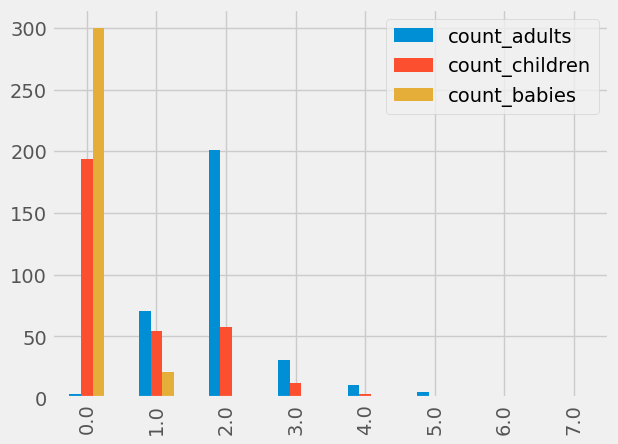

In [77]:
counts_family = pd.DataFrame({'count_adults': users.count_adults.value_counts(), 
                 'count_children': users.count_children.value_counts(),
                  'count_babies': users.count_babies.value_counts()})

counts_family.plot(kind='bar')

Text(0.5, 1.0, 'Mean regular orders per user_nuts')

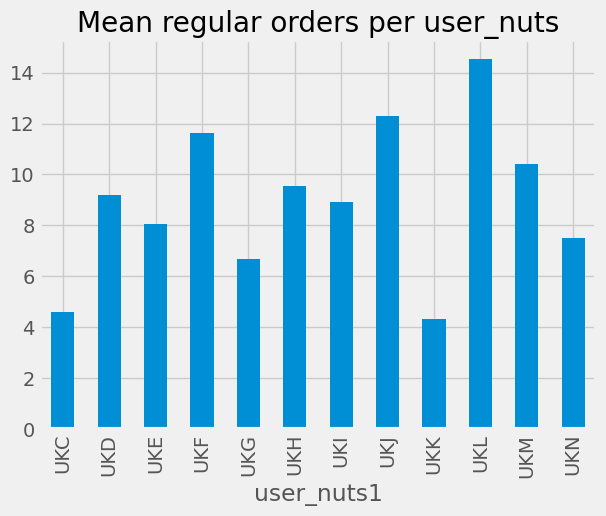

In [ ]:
users.groupby('user_nuts1')['n_regulars'].mean().plot(kind='bar')
plt.title('Mean regular orders per user_nuts')

In [89]:
# What percentage of users have at least 1 baby or 1 child
(users[['count_children','count_babies']].sum(axis=1) > 0).sum() / users.count_people.count()


np.float64(0.44272445820433437)

#### Conclusions
1. There are at least 1 baby or 1 child in 44% of houses
2. There are some regions with more regular orders (UKL, UKJ, UKF)
3. Most of the houses is formed by a couple of adults

### Regulars

In [5]:
regulars_df = regulars.merge(inventory, on='variant_id', how='left')

In [6]:
regulars_df.head()

,user_id,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
0,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03,NaN,NaN,NaN,NaN,NaN
1,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35,NaN,NaN,NaN,NaN,NaN
2,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03,NaN,NaN,NaN,NaN,NaN
3,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35,NaN,NaN,NaN,NaN,NaN
4,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11,3.49,3.5,method,cleaning-products,"[cruelty-free, eco, vegan, window-glass-cleaner]"


Text(0.5, 1.0, 'Vendor regular sales')

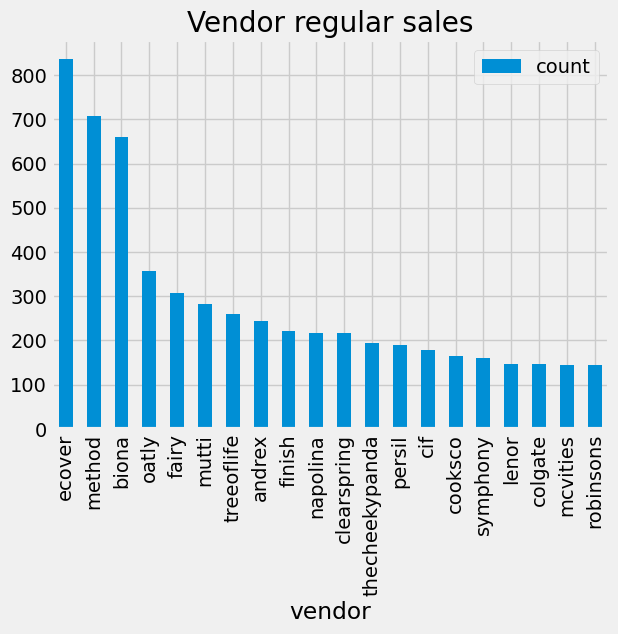

In [20]:
pd.DataFrame(regulars_df.value_counts('vendor')).head(20).plot(kind='bar')
plt.title('Vendor regular sales')

In [21]:
regulars_df[regulars_df['vendor']=='ecover'].head(4)

,user_id,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
17,d883991facbc3b07b62da342d00c97d1e6cea8d2176695...,33667198910596,2020-07-06 10:12:08,14.99,16.55,ecover,dishwashing,"[cruelty-free, dishwasher-tablets, eco, vegan]"
33,e5b770af50d862c43279d6109f99862e5b3f051b5ffda5...,33667206283396,2020-10-25 11:51:57,9.99,12.00,ecover,fabric-softener-freshener,"[cruelty-free, eco, fabric-softener-freshener,..."
41,3bb251f3a44df9ec173c3a8e3335454728e62a82826f9d...,33667207266436,2020-12-06 11:27:52,1.79,2.09,ecover,cleaning-products,"[bathroom-limescale-cleaner, cruelty-free, eco..."
44,8010a4b30f6f7d7c7180c4aa4da392ba0c763d9eec11bd...,33667207299204,2020-06-09 14:17:42,3.99,4.00,ecover,delicates-stain-remover,"[cruelty-free, delicates-stain-remover, eco, v..."


In [22]:
regulars_df[regulars_df['vendor']=='biona'].head(4)

,user_id,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
34,e6a9de6ce659cf1df9ce7e65fdd7c367cb819cdbb762e3...,33826427207812,2020-11-01 14:29:11,1.29,1.49,biona,cooking-sauces,"[pasta-pizza-sauce, tinned-tomatoes-puree-pass..."
43,7f714510bd90defeb18a27c9e2a6f431532431b8c35088...,33826421899396,2020-12-18 23:19:23,3.99,4.39,biona,tins-packaged-foods,"[christmas, chutney-pickle, organic, pickled-f..."
51,66a195720d6988ff4d32155cc03631b84f68b34d3b0a1e...,33951139135620,2020-07-06 17:17:52,1.69,2.49,biona,tins-packaged-foods,"[christmas, organic, pickled-foods-olives, vegan]"
109,27c2c38327ba83867c6291ee6bd0c35548edd256ed51c9...,33826466463876,2021-02-02 15:17:30,16.99,17.29,biona,cooking-ingredients,"[oils, organic, vegan]"


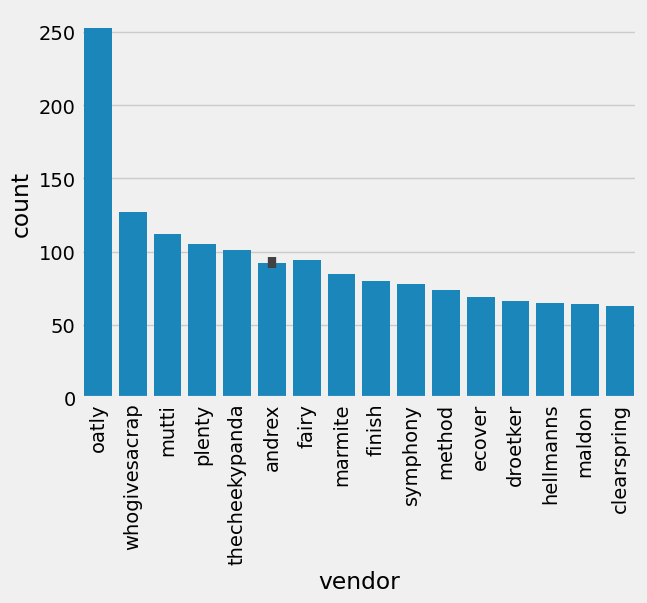

In [110]:
product_counts = regulars_df['variant_id'].value_counts().reset_index()
vendor_per_product = regulars_df.drop_duplicates('variant_id').set_index('variant_id')['vendor']
product_counts_vendor = product_counts.merge(vendor_per_product, on='variant_id', how='left')
sns.barplot(x='vendor', y='count', data=product_counts_vendor.head(20))
plt.xticks(rotation=90);

In [82]:
regulars_df[regulars_df['variant_id']==product_counts_vendor.variant_id[0]].head(1)

,user_id,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
95,1e49bd8004043d757673793e7d5ea394b4eca7f852b179...,34081589887108,2021-01-13 06:12:03,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]"


In [92]:
regulars_df[regulars_df['variant_id']==product_counts_vendor.variant_id[1]].head(1)

,user_id,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
565,12c214c4b9ec4ffb12694359db5351bb45248bb787c53b...,34370361229444,2021-02-15 20:14:31,4.99,5.5,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"


In [95]:
regulars_df['price_difference'] = regulars_df.price-regulars_df.compare_at_price

In [99]:
regulars_df.dropna().head(3)

,user_id,variant_id,created_at,price,compare_at_price,vendor,product_type,tags,price_difference
4,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11,3.49,3.50,method,cleaning-products,"[cruelty-free, eco, vegan, window-glass-cleaner]",-0.01
8,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667182493828,2020-05-06 14:42:11,4.29,5.40,bulldog,skincare,"[cruelty-free, eco, facial-skincare, vegan]",-1.11
17,d883991facbc3b07b62da342d00c97d1e6cea8d2176695...,33667198910596,2020-07-06 10:12:08,14.99,16.55,ecover,dishwashing,"[cruelty-free, dishwasher-tablets, eco, vegan]",-1.56


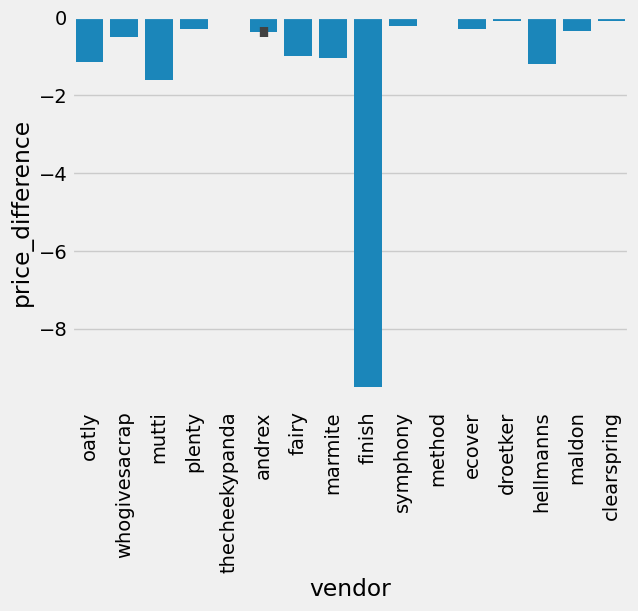

In [118]:
delta_price = regulars_df.drop_duplicates('variant_id').set_index('variant_id')['price_difference'].reset_index()
products_diff_price = product_counts_vendor.merge(delta_price, on='variant_id', how='left')
sns.barplot(x='vendor', y='price_difference', data=products_diff_price.head(20))
plt.xticks(rotation=90);

#### CONCLUSIONS
1. The vendors with more regulars (ecover, method, biona) sold is based on cruelty-free, eco, organic and vegan products
2. The product more common in regulars is from Oatly, and is a oat milk
3. In the first 20 more-sold products, the price difference w.r.t the reference is lower, which could be indicating that we are selling cheaper than competence